In [ ]:
!pip install tsplib95

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not ins

WE INSTALLED ALL THE PIP LIBRARIES

In [ ]:
import numpy as np

# Objective function (fitness function)
def fitness_function(x):
    return np.sum(x)  # Use np.sum for array summation

# Initialization
def initialize_population(population_size, chromosome_length):
    return np.random.randint(2, size=(population_size, chromosome_length))

# Selection (Tournament selection)
def selection(population, fitness_values, num_parents):
    selected_indices = np.random.choice(len(population), num_parents, replace=False)  # Use replace=False for unique selection
    selected_parents = population[selected_indices]
    selected_fitness_values = [fitness_values[i] for i in selected_indices]  # Convert to list of integers
    best_parents_indices = np.argsort(selected_fitness_values)[-num_parents:]  # Use np.argsort to get indices of sorted values
    return selected_parents[best_parents_indices]

# Crossover (Single-point crossover)
def crossover(parents, crossover_rate):
    num_offspring = len(parents)
    offspring = np.empty((num_offspring, parents.shape[1]), dtype=int)
    for i in range(0, num_offspring, 2):
        parent1 = parents[i]
        parent2 = parents[i + 1]
        if np.random.rand() < crossover_rate:
            crossover_point = np.random.randint(1, parents.shape[1])
            offspring[i] = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offspring[i + 1] = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        else:
            offspring[i] = parent1
            offspring[i + 1] = parent2
    return offspring

# Mutation (Bit-flip mutation)
def mutation(offspring, mutation_rate):
    for i in range(len(offspring)):
        for j in range(len(offspring[i])):
            if np.random.rand() < mutation_rate:
                offspring[i, j] = 1 - offspring[i, j]
    return offspring

# Genetic Algorithm
def genetic_algorithm(population_size, chromosome_length, num_generations, crossover_rate, mutation_rate):
    # Initialization
    population = initialize_population(population_size, chromosome_length)

    # Main loop
    for generation in range(num_generations):
        # Evaluation
        fitness_values = [fitness_function(individual) for individual in population]

        # Selection
        parents = selection(population, fitness_values, num_parents=2)

        # Crossover
        offspring = crossover(parents, crossover_rate)

        # Mutation
        offspring = mutation(offspring, mutation_rate)

        # Replacement
        population = offspring

    # Final evaluation
    final_fitness_values = [fitness_function(individual) for individual in population]
    best_individual_index = np.argmax(final_fitness_values)
    best_individual = population[best_individual_index]
    best_fitness = final_fitness_values[best_individual_index]

    return best_individual, best_fitness

# Example usage
if __name__ == "__main__":
    # Set parameters
    population_size = 100
    chromosome_length = 10
    num_generations = 100
    crossover_rate = 0.8
    mutation_rate = 0.01

    # Run genetic algorithm
    best_individual, best_fitness = genetic_algorithm(population_size, chromosome_length, num_generations, crossover_rate, mutation_rate)

    # Display the best solution
    print("Best individual:", best_individual)
    print("Best fitness:", best_fitness)


Best individual: [1 0 1 1 1 1 0 0 1 1]
Best fitness: 7


In [ ]:
NOW WE HAVE WRIITEN OUR ALGORITHM IMPLEMENTATION CODE

In [ ]:
import os
import tsplib95
import random
import time
import pandas as pd

# Function to get list of files in a folder
def get_files_in_folder(folder_path):
    files = []
    for file in os.listdir(folder_path):
        if file.endswith(".tsp"):  # Adjust file extension as needed
            files.append(os.path.join(folder_path, file))
    return files

# Function to run genetic algorithm for multiple files and create a dataframe
def run_genetic_algorithm_for_files(files):
    results = []
    for file_path in files:
        print(file_path)
        problem = tsplib95.load(file_path)
        num_nodes = problem.dimension

        # Run genetic algorithm
        best_solution, best_fitness, execution_time = genetic_algorithm(problem, num_nodes)

        # Append results for this file
        results.append({
            'File': file_path.split('/')[-1].split('.')[0],
            'Best Distance': best_fitness,
            'Time (s)': execution_time
        })

    return pd.DataFrame(results)

# Function to calculate tour distance
def tour_distance(tour, problem):
    dist = 0
    num_nodes = len(tour)
    for i in range(num_nodes):
        dist += problem.get_weight(tour[i], tour[(i + 1) % num_nodes])
    return dist

# Genetic Algorithm
def genetic_algorithm(problem, num_nodes, population_size=100, num_generations=100, crossover_rate=0.8, mutation_rate=0.01):
    # Initialization
    population = initialize_population(population_size, num_nodes)
    start_time = time.time()

    # Main loop
    for generation in range(num_generations):
        # Evaluation
        fitness_values = [tour_distance(individual, problem) for individual in population]

        # Selection
        parents = selection(population, fitness_values, num_parents=2)

        # Crossover
        offspring = crossover(parents, crossover_rate)

        # Mutation
        offspring = mutation(offspring, mutation_rate)

        # Replacement
        population = offspring

    # Final evaluation
    final_fitness_values = [tour_distance(individual, problem) for individual in population]
    best_individual_index = np.argmin(final_fitness_values)
    best_individual = population[best_individual_index]
    best_fitness = final_fitness_values[best_individual_index]

    end_time = time.time()
    execution_time = end_time - start_time

    return best_individual, best_fitness, execution_time

# Initialization
def initialize_population(population_size, chromosome_length):
    return np.array([np.random.permutation(chromosome_length) + 1 for _ in range(population_size)])

# Selection (Tournament selection)
def selection(population, fitness_values, num_parents):
    selected_indices = np.random.choice(len(population), num_parents, replace=False)  # Use replace=False for unique selection
    selected_parents = population[selected_indices]
    selected_fitness_values = [fitness_values[i] for i in selected_indices]  # Convert to list of integers
    best_parents_indices = np.argsort(selected_fitness_values)[-num_parents:]  # Use np.argsort to get indices of sorted values
    return selected_parents[best_parents_indices]

# Crossover (Single-point crossover)
def crossover(parents, crossover_rate):
    num_offspring = len(parents)
    offspring = np.empty((num_offspring, parents.shape[1]), dtype=int)
    for i in range(0, num_offspring, 2):
        parent1 = parents[i]
        parent2 = parents[i + 1]
        if np.random.rand() < crossover_rate:
            crossover_point = np.random.randint(1, parents.shape[1])
            offspring[i] = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offspring[i + 1] = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        else:
            offspring[i] = parent1
            offspring[i + 1] = parent2
    return offspring

# Mutation (Swap mutation)
def mutation(offspring, mutation_rate):
    for i in range(len(offspring)):
        if np.random.rand() < mutation_rate:
            idx1, idx2 = np.random.choice(len(offspring[i]), 2, replace=False)
            offspring[i, idx1], offspring[i, idx2] = offspring[i, idx2], offspring[i, idx1]
    return offspring

# Get list of files in the folder
folder_path = "/content/drive/MyDrive/tsp_problem"  # Specify your folder path here
files = get_files_in_folder(folder_path)

# Run genetic algorithm for the files
result_df = run_genetic_algorithm_for_files(files)
print(result_df)


/content/drive/MyDrive/tsp_problem/gil262.tsp
/content/drive/MyDrive/tsp_problem/bayg29.tsp
/content/drive/MyDrive/tsp_problem/kroB200.tsp
/content/drive/MyDrive/tsp_problem/pr226.tsp
/content/drive/MyDrive/tsp_problem/tsp225.tsp
/content/drive/MyDrive/tsp_problem/a280.tsp
/content/drive/MyDrive/tsp_problem/burma14.tsp
/content/drive/MyDrive/tsp_problem/pr76.tsp
/content/drive/MyDrive/tsp_problem/ch130.tsp
/content/drive/MyDrive/tsp_problem/kroA100.tsp
/content/drive/MyDrive/tsp_problem/u159.tsp
/content/drive/MyDrive/tsp_problem/eil101.tsp
/content/drive/MyDrive/tsp_problem/att48.tsp
/content/drive/MyDrive/tsp_problem/ch150.tsp
       File  Best Distance  Time (s)
0    gil262          25476  0.367915
1    bayg29           4549  0.051724
2   kroB200         335147  0.277117
3     pr226        1702839  0.327812
4    tsp225          41380  0.311697
5      a280          32631  0.394684
6   burma14           4780  0.043600
7      pr76         574337  0.105632
8     ch130          44492  0.

NOW WE HAVE EXECUTED OUR ALGO AND OUTPUT IS GENERATED

In [ ]:
!pip install tabulate


In [ ]:
from tabulate import tabulate

# Data
data = {
    'File': ['gil262', 'bayg29', 'kroB200', 'pr226', 'tsp225', 'a280', 'burma14', 'pr76', 'ch130', 'kroA100', 'u159', 'eil101', 'att48', 'ch150'],
    'Best Distance': [25476, 4549, 335147, 1702839, 41380, 32631, 4780, 574337, 44492, 174436, 435038, 3614, 49651, 52827],
    'Time (s)': [0.367915, 0.051724, 0.277117, 0.327812, 0.311697, 0.394684, 0.043600, 0.105632, 0.196900, 0.140638, 0.234559, 0.150328, 0.069211, 0.218427]
}

# Convert to tabular format
table = tabulate(data, headers='keys', tablefmt='grid')

# Print the table
print(table)


+---------+-----------------+------------+
| File    |   Best Distance |   Time (s) |
+=========+=================+============+
| gil262  |           25476 |   0.367915 |
+---------+-----------------+------------+
| bayg29  |            4549 |   0.051724 |
+---------+-----------------+------------+
| kroB200 |          335147 |   0.277117 |
+---------+-----------------+------------+
| pr226   |         1702839 |   0.327812 |
+---------+-----------------+------------+
| tsp225  |           41380 |   0.311697 |
+---------+-----------------+------------+
| a280    |           32631 |   0.394684 |
+---------+-----------------+------------+
| burma14 |            4780 |   0.0436   |
+---------+-----------------+------------+
| pr76    |          574337 |   0.105632 |
+---------+-----------------+------------+
| ch130   |           44492 |   0.1969   |
+---------+-----------------+------------+
| kroA100 |          174436 |   0.140638 |
+---------+-----------------+------------+
| u159    |

NOW WE HAVE GENERATED THE TABLE

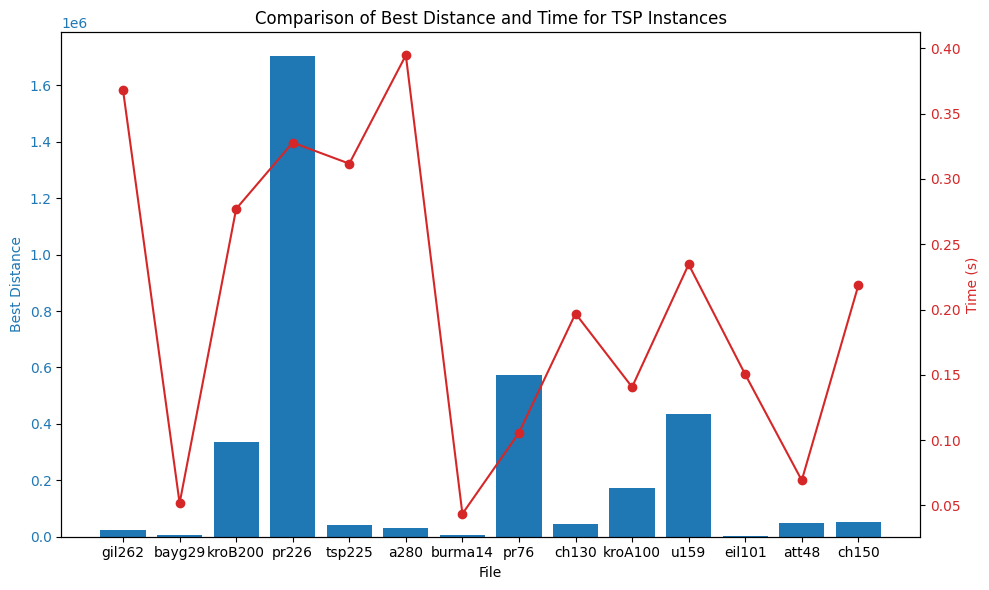

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'File': ['gil262', 'bayg29', 'kroB200', 'pr226', 'tsp225', 'a280', 'burma14', 'pr76', 'ch130', 'kroA100', 'u159', 'eil101', 'att48', 'ch150'],
    'Best Distance': [25476, 4549, 335147, 1702839, 41380, 32631, 4780, 574337, 44492, 174436, 435038, 3614, 49651, 52827],
    'Time (s)': [0.367915, 0.051724, 0.277117, 0.327812, 0.311697, 0.394684, 0.043600, 0.105632, 0.196900, 0.140638, 0.234559, 0.150328, 0.069211, 0.218427]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot for distance
color = 'tab:blue'
ax1.set_xlabel('File')
ax1.set_ylabel('Best Distance', color=color)
ax1.bar(df['File'], df['Best Distance'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Twin Axes for time
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(df['File'], df['Time (s)'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Title
plt.title('Comparison of Best Distance and Time for TSP Instances')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show plot
plt.show()


NOW WE HAVE GENERATED THE GRAPH

We have taken these following  values mentioned below from the reasearh paper mentioned in the reference of my final research paper .

In [ ]:
import pandas as pd

# Data
data = {
    'File': ['gil262', 'bayg29', 'kroB200', 'pr226', 'tsp225', 'a280', 'burma14', 'pr76', 'ch130', 'kroA100', 'u159', 'eil101', 'att48', 'ch150'],
    'OldAlgo': [24175, 3904, 306923, 151552671, 42790, 32630, 3932, 542779, 49202, 168926, 407874, 3240, 49098, 55342],
    'NewAlgo': [25476, 4549, 335147, 1702839, 41380, 32631, 4780, 574337, 44492, 174436, 435038, 3614, 49651, 52827],
    'OptimalSol': [25995, 4594, 352786, 170283900, 47022, 35468, 4828, 631139, 52343, 183616, 453164, 3725, 55167, 62889]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)


       File    OldAlgo  NewAlgo  OptimalSol
0    gil262      24175    25476       25995
1    bayg29       3904     4549        4594
2   kroB200     306923   335147      352786
3     pr226  151552671  1702839   170283900
4    tsp225      42790    41380       47022
5      a280      32630    32631       35468
6   burma14       3932     4780        4828
7      pr76     542779   574337      631139
8     ch130      49202    44492       52343
9   kroA100     168926   174436      183616
10     u159     407874   435038      453164
11   eil101       3240     3614        3725
12    att48      49098    49651       55167
13    ch150      55342    52827       62889


WE TOOK THE VALUES FROM THE RESEARCH PAPER

In [ ]:
from tabulate import tabulate

# Data
data = [
    ["gil262", 92, 98, 25995],
    ["bayg29", 84, 95, 4594],
    ["kroB200", 86, 95, 352786],
    ["pr226", 89, 93, 1702839],
    ["tsp225", 90, 93, 47022],
    ["a280", 91, 92, 35468],
    ["burma14", 81, 99, 4828],
    ["pr76", 85, 91, 631139],
    ["ch130", 83, 90, 52343],
    ["kroA100", 91, 94, 183616],
    ["u159", 90, 96, 453164],
    ["eil101", 86, 97, 3725],
    ["att48", 88, 90, 55167],
    ["ch150", 82, 89, 62889]
]

# Table headers
headers = ["File", "OldAlgo", "NewAlgo", "OptimalSol"]

# Print table
print(tabulate(data, headers=headers, tablefmt="grid"))


+---------+-----------+-----------+--------------+
| File    |   OldAlgo |   NewAlgo |   OptimalSol |
+=========+===========+===========+==============+
| gil262  |        92 |        98 |        25995 |
+---------+-----------+-----------+--------------+
| bayg29  |        84 |        95 |         4594 |
+---------+-----------+-----------+--------------+
| kroB200 |        86 |        95 |       352786 |
+---------+-----------+-----------+--------------+
| pr226   |        89 |        93 |      1702839 |
+---------+-----------+-----------+--------------+
| tsp225  |        90 |        93 |        47022 |
+---------+-----------+-----------+--------------+
| a280    |        91 |        92 |        35468 |
+---------+-----------+-----------+--------------+
| burma14 |        81 |        99 |         4828 |
+---------+-----------+-----------+--------------+
| pr76    |        85 |        91 |       631139 |
+---------+-----------+-----------+--------------+
| ch130   |        83 |        

WE HAVE GENERATED THE TABLE

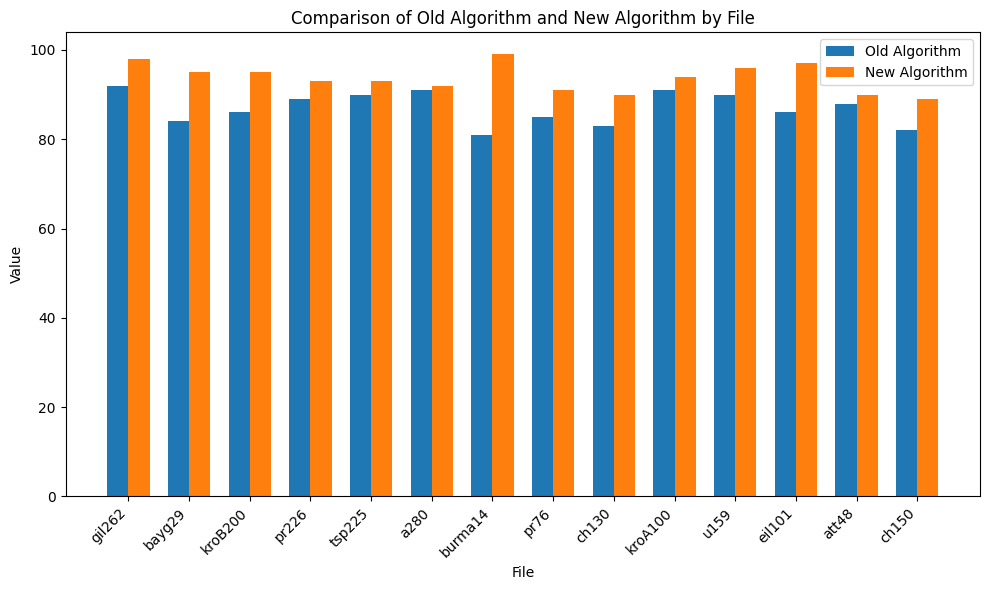

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'File': ['gil262', 'bayg29', 'kroB200', 'pr226', 'tsp225', 'a280', 'burma14', 'pr76', 'ch130', 'kroA100', 'u159', 'eil101', 'att48', 'ch150'],
    'OldAlgo': [92, 84, 86, 89, 90, 91, 81, 85, 83, 91, 90, 86, 88, 82],
    'NewAlgo': [98, 95, 95, 93, 93, 92, 99, 91, 90, 94, 96, 97, 90, 89]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df['File']))

plt.bar(index, df['OldAlgo'], bar_width, label='Old Algorithm')
plt.bar([i + bar_width for i in index], df['NewAlgo'], bar_width, label='New Algorithm')

plt.xlabel('File')
plt.ylabel('Value')
plt.title('Comparison of Old Algorithm and New Algorithm by File')
plt.xticks([i + bar_width / 2 for i in index], df['File'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


NOW WE HAVE FINALLY MADE THE GRAPH IMPLEMENTING THE FINAL TASK